In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match_ids = matches[matches.season >= 2016]['id'].unique()

In [4]:
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [5]:
team_1 = 'Delhi Capitals'
team_2 = 'Rajasthan Royals'

In [6]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

## The plot below suggests that DC will win the match

Text(0.5, 1.0, 'Percentage of Winning')

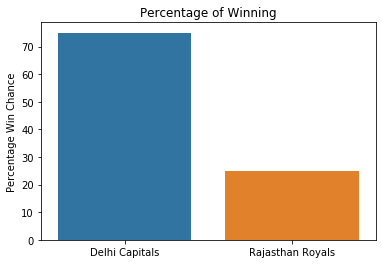

In [7]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [8]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

# Performance of DC during powerplay

Text(0.5, 1.0, 'Performance of DC during Powerplay')

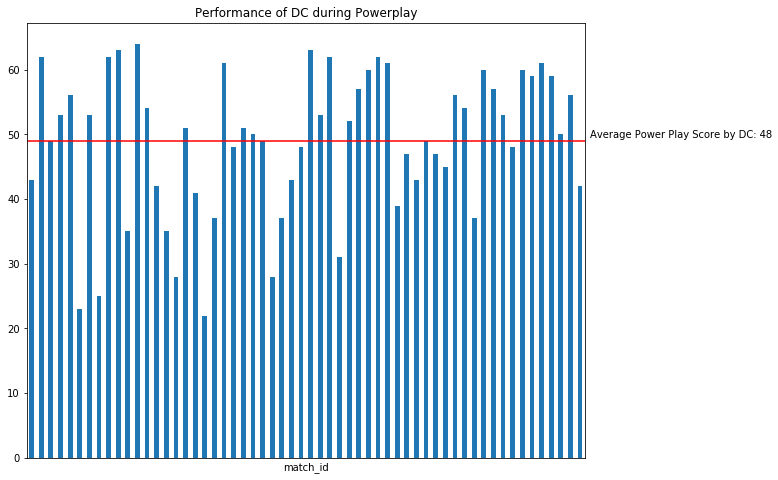

In [111]:
plt.figure(figsize=(10,8))
runs_by_dc_pp = delivery[(delivery['batting_team']==team_1) & (delivery['over']<=6)].groupby("match_id").sum()['total_runs']
runs_by_dc_pp.plot(kind='bar')
plt.axhline(y=np.mean(runs_by_dc_pp), color='red')
plt.text(x=58, y=np.mean(runs_by_dc_pp)+0.5, fontsize=10, s="Average Power Play Score by DC: {}".format(math.floor(np.mean(runs_by_dc_pp))))
plt.xticks([])
plt.title("Performance of DC during Powerplay")

# Steve Smith performance against DC bowlers

### This plot shows that Steve Smith has generally score 0-15 runs while facing DC bowlers

This plot shows that Steve Smith has generally score 0-15 runs while facing DC bowlers


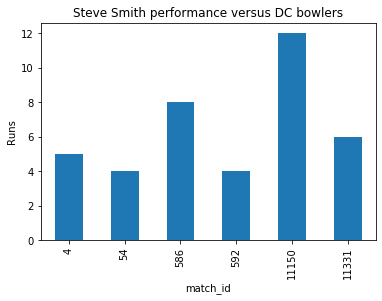

In [112]:
smith_vs_dc_bowlers = delivery[(delivery['batsman'].str.contains("SPD Smith", case=False)) & delivery['bowler'].isin(['HV Patel', "K Rabada", "R Ashwin", "AR Patel", "MP Stoinis"])].groupby("match_id").sum()
smith_vs_dc_bowlers['batsman_runs'].plot(kind='bar')
plt.ylabel("Runs")
plt.title("Steve Smith performance versus DC bowlers")
print("This plot shows that Steve Smith has generally score 0-15 runs while facing DC bowlers")

# Number of wides bowled in the match

#### By analysing bowlers

In [43]:
bowler_squad = ['HV Patel', "K Rabada", "R Ashwin", "R Tewatia", "BA Stokes", "S Gopal", "R Parag", "JD Unadkat", "J Archer", "AR Patel", "MP Stoinis"]
bowlers_wide = dict()
for bowler in bowler_squad:
    no_of_wides_per_match = np.mean(delivery[delivery['bowler']==bowler].groupby('match_id').sum()['wide_runs'])
     bowlers_wide[bowler] = no_of_wides_per_match

print("Wides predicted :", round(sum(bowlers_wide.values())))

Wides predicted : 7


# Number of wickets taken during match

#### Approach 1: Avg wickets taken during match between RR and DC

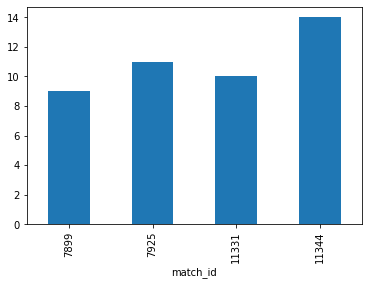

In [90]:
delivery[(delivery['batting_team'].isin([team_1, team_2])) & (delivery['bowling_team'].isin([team_1, team_2]))].groupby('match_id').sum()['player_dismissed'].plot(kind='bar')

#### Approach 2: Analyzing team wickets

In [106]:
dc_matches = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()
rr_matches =delivery[delivery['batting_team']==team_1].groupby('match_id').sum()
avg_dc_wk = np.mean(dc_matches.groupby('match_id').sum()['player_dismissed'])
avg_rr_wk = np.mean(rr_matches.groupby('match_id').sum()['player_dismissed'])
print("Average wickets taken of DC: ", avg_dc_wk)
print("Average wickets taken of RR: ", avg_rr_wk)
print("Average wickets taken during matches: ", avg_dc_wk+avg_rr_wk)

Average wickets taken of DC:  6.103448275862069
Average wickets taken of RR:  6.103448275862069
Average wickets taken during matches:  12.206896551724139


#### Approach 3: Analyzing average wickets taken by predicted bowlers playing in today's match.

In [107]:
bowler_squad = ['HV Patel', "K Rabada", "R Ashwin", "R Tewatia", "BA Stokes", "S Gopal", "R Parag", "JD Unadkat", "J Archer", "AR Patel", "MP Stoinis"]
bowlers_wickets = dict()
for bowler in bowler_squad:
    no_of_wides_per_match = np.mean(delivery[delivery['bowler']==bowler].groupby('match_id').sum()['player_dismissed'])
    bowlers_wickets[bowler] = no_of_wides_per_match

print("Wickets predicted :", round(sum(bowlers_wickets.values())))


Wickets predicted : 11


### So, all the three approaches provides the range between 11-15 of total predicted wickets taken during today's match

# Summary

- Data was cleaned and filtered. The data from year 2016 to 2019 was taken and all the non-required columns were dropped. 
- Using the "winner" column of the dataset, the percentage chances of winning between RR and DC was calculated.
- A plot was created measuring the performance of DC in there fisrt 6 overs against all matches played with all teams. Average range was taken.
- Steve Smith runs scored per match against DC bowlers was measured to calculate the range of runs Smith will score today. 
- For number of wides prediction, the bowlers average number of wides per match was calculated and summed to estimate total wides in the match. 
- For the number of wickets, again the bowlers average wickets per match was calculated and summed to estimate total wickets today. To recheck this, the average no. of wickets taken of DC and RR in different matches was calculated and summed. Another approach to finalize the range was an estimation of number of total wickets fall when DC and RR have played against each other. 